# Problem 1. MergeSort 

## 1) Set up the programming environment

#### Work with pyhon version : 3.11.4

In [2]:
import sys
print('Work with Python version:', sys.version)

Work with Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]


#### The option to merge data

There are many options to use the merge sort code algorithm to solve the question. In this case, we have chosen to use Python as a set up environment, together with a fundamental mathematical concept. We also carefully look at how much time and memory are executed inorder to support the decision making process and provide our solution more reliable and easy to follow.

## 2) Data preparing

### 2.1 Download and Clean the data

In [3]:
!pip install memory_profiler
!pip install haversine
! pip install geopy

import time
from memory_profiler import memory_usage

In [4]:
import pandas as pd
import numpy as np
from heapq import merge
import time
from memory_profiler import memory_usage

In [5]:
data = pd.read_csv('worldcities.csv')
data.head()

city city_ascii      lat       lng    country iso2 iso3   admin_name  \
0      Tokyo      Tokyo  35.6897  139.6922      Japan   JP  JPN        Tōkyō   
1    Jakarta    Jakarta  -6.1750  106.8275  Indonesia   ID  IDN      Jakarta   
2      Delhi      Delhi  28.6100   77.2300      India   IN  IND        Delhi   
3  Guangzhou  Guangzhou  23.1300  113.2600      China   CN  CHN    Guangdong   
4     Mumbai     Mumbai  19.0761   72.8775      India   IN  IND  Mahārāshtra   

   capital  population          id  
0  primary  37732000.0  1392685764  
1  primary  33756000.0  1360771077  
2    admin  32226000.0  1356872604  
3    admin  26940000.0  1156237133  
4    admin  24973000.0  1356226629

In [6]:
data.describe()

lat           lng    population            id
count  44691.000000  44691.000000  4.438400e+04  4.469100e+04
mean      25.933692     14.526105  1.143739e+05  1.454094e+09
std       23.225258     71.153080  7.148542e+05  2.625680e+08
min      -54.933300   -179.600000  0.000000e+00  1.004003e+09
25%       12.900000    -48.109750  1.218700e+04  1.250637e+09
50%       32.340000     13.500000  2.099900e+04  1.380780e+09
75%       43.333300     77.316550  4.800775e+04  1.705844e+09
max       81.716600    179.370300  3.773200e+07  1.934976e+09

In [7]:
# Missing values

print(data.isnull().sum())

city              0
city_ascii        0
lat               0
lng               0
country           0
iso2             33
iso3              0
admin_name      316
capital       33553
population      307
id                0
dtype: int64


In [8]:
# check duplication for overall dataset

duplicate = data.duplicated()
duplicate.sum()

0

In [9]:
# Check if there any null value in overall dataset

print(data.isnull().sum())

city              0
city_ascii        0
lat               0
lng               0
country           0
iso2             33
iso3              0
admin_name      316
capital       33553
population      307
id                0
dtype: int64


## 3) The solution

## Problem 1. MergeSort (Total: 50 marks)

### At first, use the unique latitude values of each city only. (25 marks)

In [10]:
# select only latitude column 

df = data['lat']
print(f'List of latitude values : {df.head()}')
print('-'* 40)
print(f'Total number of latitude values : {df.count()}')

List of latitude values : 0    35.6897
1    -6.1750
2    28.6100
3    23.1300
4    19.0761
Name: lat, dtype: float64
----------------------------------------
Total number of latitude values : 44691


In [11]:
# Check for duplication value in latitude column 

print(f'Duplication value in latitude column : {df.duplicated().sum()}')

Duplication value in latitude column : 10034


In [12]:
# As required from the task, drop the row with duplication values

df = df.drop_duplicates()
df.shape

(34657,)

In [13]:
# Turn latitude data into pandas Dataframe and Check the type of data

df = pd.DataFrame(df)
df['lat'].dtype
# print(type(df))D

dtype('float64')

In [14]:
# Get the data ready by turned data into one dimentional numpy array

dfn = pd.DataFrame(df).to_numpy()
print(f'Types of Latitude values : {type(dfn)}' )

print('-'* 50)
dfn = dfn.flatten()
print(f'Latitude values in one dimentional numpy array form : {dfn}')

print('-'* 50)
# Check the shape to make sure that get the same number after turn data to numpy array
print(f'Shape : {dfn.shape}')

Types of Latitude values : <class 'numpy.ndarray'>
--------------------------------------------------
Latitude values in one dimentional numpy array form : [ 35.6897  -6.175   28.61   ...  81.7166 -16.7795  74.0165]
--------------------------------------------------
Shape : (34657,)


### a. Implement a proper merge sort algorithm so that all city latitudes are in an ordered list.

#### i.The flow chart shows an easy step of how merge sort is implemented to sort city latitudes in an ordered list.

#### Pipeline for merge sort image figure(1): 
    
Given an array with n items: 

#### 1. Divide and recursive(sort): 
The array  are divided into two subarray each with n/2 items, by n keys is in non-decresding sequence. Then, Recursive(sort): Sort each subarray by sorting it. Unless the array is sufficiently small, recursively apply mergesort for further divide and sort it.
#### 2. Merge (combine): 
Merge the sorted subarrays into a single sorted array. This step includes combining the elements from the subarray in order, preserving the non-decresing sequence.


!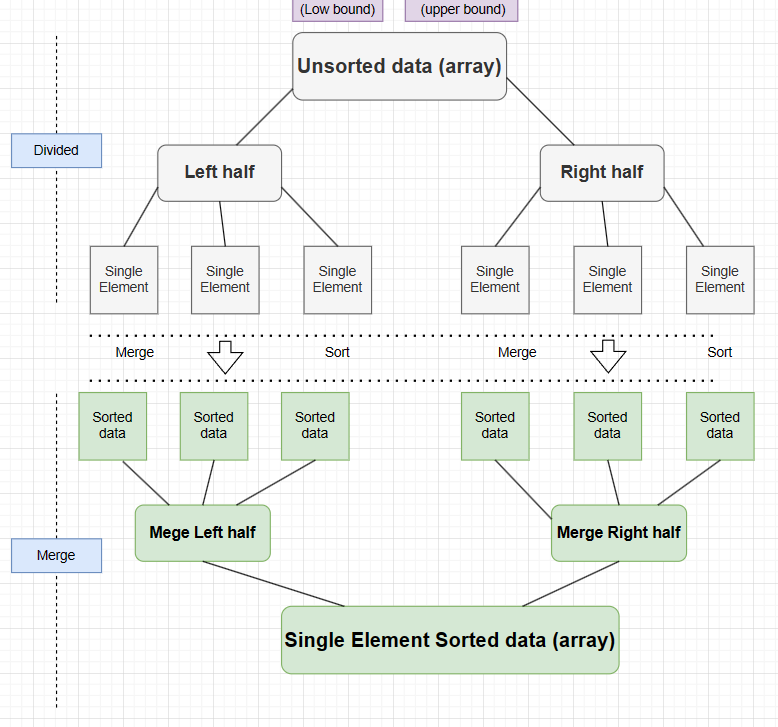

#### ii Pseudocode 
An overall Pseudocode represents the process of how mergesort algorithm are used to solve the problem, and can count the number of merge opearions while sorting the array. This is helpful to understand how insight code are implemented.

In [14]:
step 1 Divided Unsorted data and count merge operation:
    # Given total number of latitude is 34657.
    
    mergesort_and_counting_number_merge_operation(array, low(lower bound = 0), high(upper boound = 34657))
        if (low >= high): # mean it is not 0 value, so we can continue merge sort becuase the condition is True
            then return array[low:hight + 1], 0
            
            # Find middle element by divided into two equal half, left and right (0 + 34657)/2 = 17273.5
            mid = (low + high) // 2  
            
            ***Here is where recursively occured***
            
            # Mergesort on array A,from low, to middle *sort the First half are divided (0, 17274)
            left, left_count <-- mergesort_and_counting_number_merge_operation(array, low, mid)  
            
            # Mergesort on array A, from  middle + 1 to high *sort the second half are divided (17275, 34657)
            right, right_count <-- mergesort_and_counting_number_merge_operation(array, mid +1,high) 
            
            merge, count_number_of_merge = mergesort_and_counting_number_merge_operation(left, right)
            total_number_of_count = left + right + count_number_of_merge
            
            return merge, total_number_of_count
            
Step 2 Merge to sorted data:      
    # Mergeback on array A, from low to mid, and from mide to high. (0, 17274, 34657)
    merge_and_count(array, low, mid, high) 
    
        i = 0 (lower bound : initial index of subarray L (left))
        j = 0 / mid + 1 (initilal index of second subarray R (right))
        k = lower bound (initial sub index of merge subarray array)
        
        count_number_of_merge = 0 # Initialsize count as 0
        
        if left and right:
            count_number_of_merge = 1
        
        while (i < mid length(left) and j < upperbound length(right)):
            
        # count_number_of_merge += 1 # The count increment for each comparison operation

            if (left[i] <= right[j]) then
                array[k].append(left[i]) to result
                    i += 1
            else:
                array[k].append(right[j]) to result
                    j += 1
        # After merging an element from two list (left and right) based on the order, 
        # it checks if there are any remaining elements in either list,
        # If so the remaining element are append to the result list. This is neccessary because :
        # The remaining element in either list are already sorted.
        # They didn't have a corresponding element in the other list to be compare againts.
 
        # Seperate subaary for left, Fill in any remaining elements from the left to the merged array
        while i <= length(left):
            Append left[i] to result array
            Increment i by 1
            
        # Seperate subaary for right, Fill in any remaining elements from the right to the merged array
        while j <= length(right):
            Append left[j] to result array
            Increment j by 1

        return result k, count_number_of_merge
    
End Function
    
# 0 means the lower bound or the array, indicating the starting index for the sort to entire array
# len(dfn) is the upper bound of the array, indicate the last index index in the array
# upper bound of the array and the last index in the array minus one to calculate the range of array.
sorted_number, count_number_of_merge =  mergesort_and_counting_number_merge_operatio(dfn, 0, len(dfn) - 1) 

print'The output after merge sorted is:', sorted_number   # Completion sorted array results
print'Total number of during merge sort operation:', count_number_of_merge 
# Shows number of merge operation during the process.

SyntaxError: invalid syntax (448927728.py, line 1)

### III The code shows the complete merge sort process for latitude data in the numpy array variable called 'dfn' and calculate time and peak memory usage for merge sort process of latitude dataset.

In [15]:
def mergesort_and_counting_number_merge_operation(arr, low, high):
    if low >= high:
        return arr[low:high+1], 0
    # Find middle element by divided into two equal half, left and right (0 + 34657)/2 = 17273.5
    mid = (low + high) // 2
    #  ***Here is where recursively occured***
    # Mergesort on array A,from low, to middle *sort the First half are divided (0, 17274)
    left, left_count = mergesort_and_counting_number_merge_operation(arr, low, mid)
    
    # Mergesort on array A, from  middle + 1 to high *sort the second half are divided (17275, 34657)
    right, right_count = mergesort_and_counting_number_merge_operation(arr, mid + 1, high)

    merged, count_number_of_merge = merge_and_count(left, right)
    total_count = left_count + right_count + count_number_of_merge

    return merged, total_count

def merge_and_count(left, right):
    # Mergeback on array A, from low to mid, and from mide to high. (0, 17274, 34657)
    k = []
    count_number_of_merge = 0 # Initialsize count as 0
    
    if left and right:
        count_number_of_merge = 1
        
    i, j = 0, 0

    while i < len(left) and j < len(right):
        
    # count_number_of_merge += 1 # The count increment for each comparison operation
        if left[i] <= right[j]:
            k.append(left[i])
            i += 1
        else:
            k.append(right[j])
            j += 1
        # After merging an element from two list (left and right) based on the order, 
        # it checks if there are any remaining elements in either list,
        # If so the remaining element are append to the result list. This is neccessary because :
        # The remaining element in either list are already sorted.
        # They didn't have a corresponding element in the other list to be compare againts
   
    #Seperate subaary for left, Fill in any remaining elements from the left to the merged array 
    while i < len(left):
        k.append(left[i])
        i += 1
    
    # Seperate subaary for right, Fill in any remaining elements from the right to the merged array
    while j < len(right):
        k.append(right[j])
        j += 1
    return k, count_number_of_merge

# Run the function
# 0 means the lower bound or the array, indicating the starting index for the sort to entire array
# len(dfn) is the upper bound of the array, indicate the last index index in the array
# upper bound of the array and the last index in the array minus one to calculate the range of array.

# Step 1 : Start time and memory measurement
count_start_time_random = time.time()

# Calculate peak memory usage
peak_memory_before = max(memory_usage(-1, interval=0.1, timeout=1))

# Running the out put
sorted_number, count_number_of_merge = mergesort_and_counting_number_merge_operation(dfn, 0, len(dfn) - 1)

# Step 2: Generate execution time and memory used during executing the code.
count_end_time_random = time.time()
time_consume_and_counting_number_merge_operation = count_end_time_random - count_start_time_random
peak_memory_after = max(memory_usage(-1, interval=0.1, timeout=1))
peak_memory_usage_and_counting_number_merge_operation = max(peak_memory_after, peak_memory_before)


print('Execution time for latitude merge sort', time_consume_and_counting_number_merge_operation, 'seconds')
print('Memory usgae', peak_memory_usage_and_counting_number_merge_operation, 'MiB')
print('-'* 50)
print('Total number of merges sort during merge operation:', count_number_of_merge)
print('-'* 50)
print('The output after merge sorted is:\n\n', sorted_number)
print('')

# some part are implemented from Stack Overflow. (n.d.). Array Merge sort Sorting Count and Sorting time Python. 
# [online] Available at: https://stackoverflow.com/questions/67534291/array-merge-sort-sorting-count-and-sorting-time-python 
# [Accessed 28 Nov. 2023].

Execution time for latitude merge sort 1.1573843955993652 seconds
Memory usgae 131.43359375 MiB
--------------------------------------------------
Total number of merges sort during merge operation: 34656
--------------------------------------------------
The output after merge sorted is:

 [-54.9333, -54.8019, -54.2833, -54.2806, -53.7833, -53.1667, -51.7333, -51.7, -51.65, -51.6233, -51.5333, -50.3333, -49.983, -49.3, -48.7667, -48.4683, -47.75, -47.2547, -46.9, -46.795, -46.5886, -46.55, -46.4333, -46.4131, -46.1833, -45.9333, -45.875, -45.8742, -45.8647, -45.6869, -45.6, -45.5667, -45.4167, -45.4, -45.0167, -44.865, -44.7, -44.3931, -44.0333, -43.9514, -43.5833, -43.531, -43.386, -43.3, -43.25, -43.0992, -42.9769, -42.9, -42.8806, -42.7667, -42.7156, -42.6219, -42.4667, -42.45, -42.4, -42.3833, -42.3, -42.2667, -42.0667, -42.05, -41.9667, -41.8667, -41.7667, -41.7581, -41.6167, -41.5167, -41.4667, -41.4419, -41.4, -41.3333, -41.3167, -41.3, -41.2889, -41.2708, -41.2581, -41.2167, -

## b. Count the number of merges needed to sort the dataset. Does it change if you randomly order the list before sorting? Why/why not

The task is requested to count the number of merges needed to sort a dataset. The Phrase "count the number of merges " could be interpreted in two ways. It could mean the total number of time the subarray are combined while merge sort process, or it can be referred to count the number of comparisons made in each elemenst during merge sort process. Hence, we decided to addressed both citeria as follow :

### I. Count the number of Merges in mergesort operation:
After finishing an implemented merge sort algorithm in part 'a' to order the array list of city's latitudes, this part requires counting the number of merges needed to sort the data set. In a merge sort algorithm in 'a', the data are divided into small parts, and these parts are then merged together in a sorted order. Hence, count the number of merges to keep track in each instance where two of single element arrays combined into one, and each combination counts as one merge operation. Additionally, given a natural process of mergesort the number of merge operations for an array of 'n' elements will generally be n-1 as shown below with 'len(dfn) - 1.

In task 'a' we count the number of merging operations done along with the ordering latitude numbers. To keep track of the overall numbers of merge operations conducted throughout the sorting process, the 'count_number_of_merge' variable in the 'merge' function is set to '1' for each run of the 'mergesort_and_counting_number_merge_operation' function.
The total number of merging operations is:

In [16]:
sorted_number, count_number_of_merge = mergesort_and_counting_number_merge_operation(dfn, 0, len(dfn) - 1)
print('Total number of merges:', count_number_of_merge)

Total number of merges: 34656


#### Understanding Merge operation
As we have a large number of dataset 34,657 elements, in (figure 2), we examine a subset of only 8 elelmets with the calcuation, given the total number of merge operation at 7, this flow chart demonstrates how merge operation is created in each step. The underlying step remains the same regardless of the array size, only the number of element is different. 

To clarify more, given the merge operation count in step 2 ('Merge to sort data') in Psedusocode. For the dataset with the number of 34,657 elements, we can count the number of merge operation as follows :

   1. Initial Array (34,657) : We starts as a single unsorted array of 34,657 elements.

   2. Subsequent Splits: Follws the same step by spilting each sub array into half and count each merge that combines them back together. The number at that level double at that each split as the process shows in figure 2 (1 + 2 + 4 in the case of 8 elements).
    
   In summary, from using Python code to count number of merge operation.The total number of merges during operation is 34656.


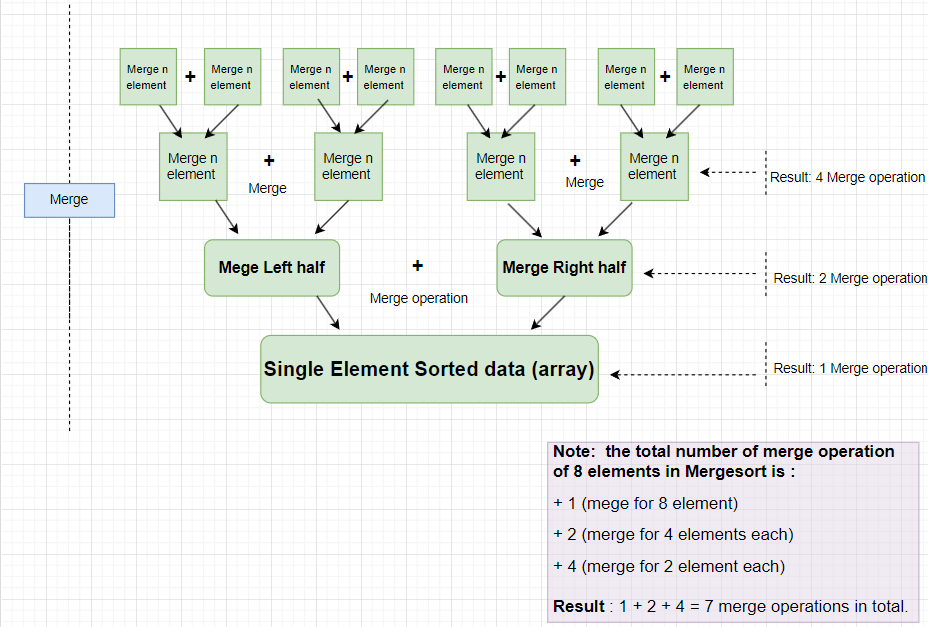

### II. Count the number of comparisons

In [17]:
def mergesort_and_counting_number_merge_comparisons(arr, low, high):
    if low >= high:
        return arr[low:high+1], 0

    mid = (low + high) // 2
    left, left_count = mergesort_and_counting_number_merge_comparisons(arr, low, mid)
    right, right_count = mergesort_and_counting_number_merge_comparisons(arr, mid + 1, high)

    merged, count_number_of_comparisons= merge_and_count(left, right)
    total_count = left_count + right_count + count_number_of_comparisons

    return merged, total_count

def merge_and_count(left, right):
    k = []
    count_number_of_comparisons = 0
    
    
#     if left and right:
#         count_number_of_comparisons = 1
        
    i, j = 0, 0

    while i < len(left) and j < len(right):
        
        count_number_of_comparisons +=1
        if left[i] <= right[j]:
            k.append(left[i])
            i += 1
        else:
            k.append(right[j])
            j += 1
            
    # append remaining element for left
    while i < len(left):
        k.append(left[i])
        i += 1
    
    # append remaining element for right
    while j < len(right):
        k.append(right[j])
        j += 1

    return k, count_number_of_comparisons

# Running the out put
sorted_number, total_count_number_of_comparisons= mergesort_and_counting_number_merge_comparisons(dfn, 0, len(dfn) - 1)
print('Total number of comparisons made between elements during these operations is:', total_count_number_of_comparisons)

Total number of comparisons made between elements during these operations is: 478842


### Effect of randomly ordering the List before sorting.
The question asked is whether the random order of the dataset influences the number of merges required by the merge sort algorithm. We will write a code to reorganize the dataset at random and then use merge sort to determine whether the number of merges varies while sorting the array of latitude numbers.

#### Randomly reoder the dataset

In [18]:
import random
import numpy as np
np.random.shuffle(dfn)
print(dfn)

[ 40.0667  -4.8311 -35.0167 ...  33.9417  22.28     3.52  ]


### I. Counting the number of merges during merge sort operation. 
#### Apply merge sort algorithm with a randomly ordered Latitude dataset to evaluate changes during the process in merge operation.

In [19]:
def merge_sort_and_counting_random_data(arr, low, high):
    if low >= high:
        return arr[low:high+1], 0

    mid = (low + high) // 2
    left, left_count = merge_sort_and_counting_random_data(arr, low, mid)
    right, right_count = merge_sort_and_counting_random_data(arr, mid + 1, high)

    merged, count_number_of_merge = merge_and_count(left, right)
    total_count = left_count + right_count + count_number_of_merge

    return merged, total_count

def merge_and_count(left, right):
    k = []
    count_number_of_merge_random = 0
    
    
    if left and right:
        count_number_of_merge_random = 1
        
    i, j = 0, 0

    while i < len(left) and j < len(right):
#         count_number_of_merge += 1
        if left[i] <= right[j]:
            k.append(left[i])
            i += 1
        else:
            k.append(right[j])
            j += 1

     # append remaining element for left
    while i < len(left):
        k.append(left[i])
        i += 1
    
    # append remaining element for right
    while j < len(right):
        k.append(right[j])
        j += 1

    return k, count_number_of_merge_random


# Step 1 : Start time and memory measurement
count_start_time_random = time.time()

# Calculate peak memory usage
peak_memory_before = max(memory_usage(-1, interval=0.1, timeout=1))

# Running the out put
sorted_number, count_number_of_merge_random = merge_sort_and_counting_random_data(dfn, 0, len(dfn) - 1)

# Step 2: Generate execution time and memory used during executing the code.
count_end_time_random = time.time()
time_consume_and_counting_random_data = count_end_time_random - count_start_time_random
peak_memory_after = max(memory_usage(-1, interval=0.1, timeout=1))
peak_memory_usage_and_counting_random_data = max(peak_memory_after, peak_memory_before)


print('')
print('Execution time', time_consume_and_counting_random_data, 'seconds')
print('Peak Memory usgae', peak_memory_usage_and_counting_random_data, 'MiB')
print('-'* 38)
print('Total number of merges sort during merge operation is:', count_number_of_merge_random)
print('-'* 38)
print('The output after merge sorted is:\n\n', sorted_number)


# some part are implemented from Stack Overflow. (n.d.). Array Merge sort Sorting Count and Sorting time Python. 
# [online] Available at: https://stackoverflow.com/questions/67534291/array-merge-sort-sorting-count-and-sorting-time-python 
# [Accessed 28 Nov. 2023].


Execution time 1.1615099906921387 seconds
Peak Memory usgae 134.11328125 MiB
--------------------------------------
Total number of merges sort during merge operation is: 34656
--------------------------------------
The output after merge sorted is:

 [-54.9333, -54.8019, -54.2833, -54.2806, -53.7833, -53.1667, -51.7333, -51.7, -51.65, -51.6233, -51.5333, -50.3333, -49.983, -49.3, -48.7667, -48.4683, -47.75, -47.2547, -46.9, -46.795, -46.5886, -46.55, -46.4333, -46.4131, -46.1833, -45.9333, -45.875, -45.8742, -45.8647, -45.6869, -45.6, -45.5667, -45.4167, -45.4, -45.0167, -44.865, -44.7, -44.3931, -44.0333, -43.9514, -43.5833, -43.531, -43.386, -43.3, -43.25, -43.0992, -42.9769, -42.9, -42.8806, -42.7667, -42.7156, -42.6219, -42.4667, -42.45, -42.4, -42.3833, -42.3, -42.2667, -42.0667, -42.05, -41.9667, -41.8667, -41.7667, -41.7581, -41.6167, -41.5167, -41.4667, -41.4419, -41.4, -41.3333, -41.3167, -41.3, -41.2889, -41.2708, -41.2581, -41.2167, -41.18, -41.1667, -41.15, -41.1333, -41.

####  The number of merge operations remain the same, same as the ordering list.

In [20]:
print('Number of merges during merge sort operation:')
print('"Before", randomly reorder dataset.', count_number_of_merge)
print('"After",randomly reorder dataset.', count_number_of_merge_random)

Number of merges during merge sort operation:
"Before", randomly reorder dataset. 34656
"After",randomly reorder dataset. 34656


### Result: The total number of merges during operation remains constant but why?
The number of merge operations remains constant after randomly rearranging the data with the 'random' library and performing the same merge sort technique, regardless of whether 'np.random.shuffle(dfn)' is utilized. This is due to the fact that in the case of merge sort. It is a divide and conquer algorithm that continually separates the dataset in half until it reaches single elements, which are then merged back together. The number of splits (and merges) is determined by the total number of items rather than their initiatial order. As a result, whether the list is arranged randomly or not, the number of merges necessary should remain constant, as it is determined by the size of the list rather than its order.

This is due to every division splits the dataset into halves, wich result in a predictable number of merge base cases where the individual elements are naturally ordered, allowing for efficient merging and eventual reconstruction of the fully sorted dataset.

### II. Counting the number of comparisons
#### Apply merge sort algorithm with a randomly ordered Latitude dataset to evaluate changes in  comparisons process :

In [21]:
def mergesort_and_counting_number_merge_comparisons(arr, low, high):
    if low >= high:
        return arr[low:high+1], 0

    mid = (low + high) // 2
    left, left_count = mergesort_and_counting_number_merge_comparisons(arr, low, mid)
    right, right_count = mergesort_and_counting_number_merge_comparisons(arr, mid + 1, high)

    merged, count_number_of_comparisons= merge_and_count(left, right)
    total_count = left_count + right_count + count_number_of_comparisons

    return merged, total_count

def merge_and_count(left, right):
    k = []
    count_number_of_comparisons = 0
    
    
#     if left and right:
#         count_number_of_comparisons = 1
        
    i, j = 0, 0

    while i < len(left) and j < len(right):
        
        count_number_of_comparisons +=1
        if left[i] <= right[j]:
            k.append(left[i])
            i += 1
        else:
            k.append(right[j])
            j += 1
            
    # append remaining element for left
    while i < len(left):
        k.append(left[i])
        i += 1
    
    # append remaining element for right
    while j < len(right):
        k.append(right[j])
        j += 1


    return k, count_number_of_comparisons

# Step 1 : Start time and memory measurement
count_start_time_random = time.time()

# Calculate peak memory usage
peak_memory_before = max(memory_usage(-1, interval=0.1, timeout=1))


# Running the out put
sorted_number, total_count_number_of_comparisons= mergesort_and_counting_number_merge_comparisons(dfn, 0, len(dfn) - 1)

# Step 2: Generate execution time and memory used during executing the code.
count_end_time_random = time.time()
time_consume_and_counting_number_merge_comparisons = count_end_time_random - count_start_time_random
peak_memory_after = max(memory_usage(-1, interval=0.1, timeout=1))
peak_memory_usage_and_counting_number_merge_comparisons = max(peak_memory_after, peak_memory_before)


print('')
print('Execution time', time_consume_and_counting_number_merge_comparisons, 'seconds')
print('Peak Memory usgae', peak_memory_usage_and_counting_number_merge_comparisons, 'MiB')
print(('-')*40)
print('Total number of comparisons made between elements during these operations is:', total_count_number_of_comparisons)
print(('-')*40)
print('The output after merge sorted is:\n\n', sorted_number)

# some part are implemented from Stack Overflow. (n.d.). Array Merge sort Sorting Count and Sorting time Python. 
# [online] Available at: https://stackoverflow.com/questions/67534291/array-merge-sort-sorting-count-and-sorting-time-python 
# [Accessed 28 Nov. 2023].



Execution time 1.1575291156768799 seconds
Peak Memory usgae 134.2421875 MiB
----------------------------------------
Total number of comparisons made between elements during these operations is: 479210
----------------------------------------
The output after merge sorted is:

 [-54.9333, -54.8019, -54.2833, -54.2806, -53.7833, -53.1667, -51.7333, -51.7, -51.65, -51.6233, -51.5333, -50.3333, -49.983, -49.3, -48.7667, -48.4683, -47.75, -47.2547, -46.9, -46.795, -46.5886, -46.55, -46.4333, -46.4131, -46.1833, -45.9333, -45.875, -45.8742, -45.8647, -45.6869, -45.6, -45.5667, -45.4167, -45.4, -45.0167, -44.865, -44.7, -44.3931, -44.0333, -43.9514, -43.5833, -43.531, -43.386, -43.3, -43.25, -43.0992, -42.9769, -42.9, -42.8806, -42.7667, -42.7156, -42.6219, -42.4667, -42.45, -42.4, -42.3833, -42.3, -42.2667, -42.0667, -42.05, -41.9667, -41.8667, -41.7667, -41.7581, -41.6167, -41.5167, -41.4667, -41.4419, -41.4, -41.3333, -41.3167, -41.3, -41.2889, -41.2708, -41.2581, -41.2167, -41.18, -41.1

####  The number of comparions change when apply randomly order dataset, same as the ordering list.

In [22]:
print('-'* 38)
print('Total comparisons needed to sort the dataset completely using MergeSort:', total_count_number_of_comparisons)

--------------------------------------
Total comparisons needed to sort the dataset completely using MergeSort: 479210


### Result: variation in the number of comparisons with randomly ordered data sets

Observation: It is observed that while the number of merge operations in merge sort remains the same, the number of comparisons change when using a random dataset but why in this case ?

It can be seen that the number of merge operations remain constant regardless of the initial number of the dataset because in the step of dividing the dataset into sub arrays and merging those subarrays is structured depends on size of dataset, and doesn't  depend on the order of the array, so the number of merge operation remains the same regardless of whether the array is sorted, or in random order.
On the other hand, comparisons are individual evaluations. That means, its evaluations are made to determine the order between elements from two subarrays. The number of comparisons can differ based on the initial order of the array. If the array order is already sorted, fewer sorted comparisons may be needed because the data is presorted, making merge step more efficient.
However, if the array is in a random order, more comparisons will be needed because the order of an element is no guarantee of relative ordering between the sub arrays and each element from the sub array needs to be compared to determine its order.

## c. Implement a proper merge sort algorithm so that the (latitude, and longitude) pairs are in an ordered list. What distance measure is used

## Use the latitude and longitude values for each city.

### Dicision making :
#### Include duplicate city, latitude and longitude numbers

The question does not require us to identify the unique values, given that the uniqueness of city names is not specific as a requirement, so we process to sort all latitude and longitude pairs, including duplicates city names. This will sort the entire data set based on the geographic coordinates without filtering out any duplicates.

Therefore, to support our decision, we investigate into pair of latitude and longitude based on unique city names. In this dataset there is 3348 city names that are duplicated and 137 with the same values of latitude and longitude which might be the reason why there are cities with same name but different locations. Moreover, there could be many cities that are less than a degree apart in latitude and longitude that have the same duplicate value in longitude and latitude. Wich is why we have chosen not to select unique values in this case.

To sort by pairs of latitude and longitude with the number of data `44,691` pairs of geographical coordinates. We decided to employ two methods to order the list.

The primary approach involves calculating the distance between each coordinate pair and reference points, sorting the dataset based on the ascending order of measure distances.

As an additional exploratory step, we implemented the second sorting approach : to sort primarily by latitude, and secondarily by longitude. This means that if two cities share the same latitude, their order would be determined by their longitude. This step is to ensure that the dataset is sorted according to a meaningful geographical criteria using a merge sort algorithm and showcases how well of merge sort algorithm in managing large dataset.


#### Duplication Verification for Identical City Names and Geographical Coordinates:

In [23]:
# Check for the number of duplicate numbers in latitude and longtitude dataset
la_and_long = data[['lat','lng']]
la_and_long.duplicated().sum()

137

In [24]:
# Duplicate in the same city name
la_and_long = data['city']
la_and_long.duplicated().sum()

3348

### I. Create a list of tuple

In the task we are required to compare pairs of geographic coordinates latitude and longitude for each city. In this step, we have converted these coordinates pairs into tiples. This code employ a list comprehension method in Python, and create a list named 'pair_cities_la_and_long'. Each element within the list is a tuple that contain the city name along with its latitude and longitude.

In [25]:
# Create a list of tuples : (cityname, latitude, longtitude)

# This reuslts shows a list of tuple, the city and its geogaphical coordinates. 
pair_cities_la_and_long = [(row['city'], row['lat'], row['lng']) for row in data.to_records()]

print('-'*30)
print(pair_cities_la_and_long[30])

------------------------------
('Xi’an', 34.2667, 108.9)


In [26]:
# Check the total number of cities and its coordinates.

number_total_cities = len(pair_cities_la_and_long)
print('-'*30)
print('The total number of cities and its coordinates:', number_total_cities)

------------------------------
The total number of cities and its coordinates: 44691


### II. Sorting process

### 1).  Implement a proper merge sort algorithm so that the (latitude, and longitude) pairs are in an ordered list. What distance measure is used

### Merge sort Coordinates by Distance using Haversine Formula


The dataset has been sorted in ascending order base on distance of each coordinate pair, shortest to longest, from (original area 1) to the city of Bangkok (destination 2 - latitude=13.736717, longitude=100.523186).

In order to measure the distance of latitude and longitude, we have employed a mathematical theory known as the Haversine formula. This formula calculates the distance between two points. The result is the distance between points presented in kilometers.


#### References:

[Stack Overflow. (n.d.). python - Getting distance between two points based on latitude/longitude. [online] Available at: https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude.]

[Louwers, J. (2023). Calculate Geographic distances in Python with the Haversine method. [online] Medium. Available at: https://louwersj.medium.com/calculate-geographic-distances-in-python-with-the-haversine-method-ed99b41ff04b.]

In [27]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2=13.736717, lon2=100.523186):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers
    return c * r

In [28]:
def merge_sort_pair_distance(array_pair, low, high):
    if low < high - 1:
        mid = (low + high) // 2

        # Recursive calls for each half
        merge_sort_pair_distance(array_pair, low, mid)
        merge_sort_pair_distance(array_pair, mid, high)

        # Merge two halves together
        value = []
        i = low 
        j = mid

        while i < mid or j < high:
            # Check if we've reached the end of either subarray
            if i >= mid:
                value.append(array_pair[j])
                j += 1
            elif j >= high:
                value.append(array_pair[i])
                i += 1
                
            # sort base on element at index 3
            elif array_pair[i][3] < array_pair[j][3]:
                value.append(array_pair[i])
                i += 1
            else:
                value.append(array_pair[j])
                j += 1

        # Copy sorted elements back to original array
        for k in range(len(value)):
            array_pair[low + k] = value[k]

# Step 1 : Start time and memory measurement
count_start_time_random = time.time()

# Calculate peak memory usage
peak_memory_before = max(memory_usage(-1, interval=0.1, timeout=1))

# Running the out put
cities_with_distance = [(city, lat, lon, haversine(lat, lon)) for city, lat, lon in pair_cities_la_and_long]
merge_sort_pair_distance(cities_with_distance, 0, len(cities_with_distance))

# Step 2: Generate execution time and memory used during executing the code.
count_end_time_random = time.time()
time_consume_pair_distance = count_end_time_random - count_start_time_random
peak_memory_after = max(memory_usage(-1, interval=0.1, timeout=1))
peak_memory_usage_pair_distance = max(peak_memory_after, peak_memory_before)

# Print the output
print('')
print('Execution time',time_consume_pair_distance, 'seconds')
print('Memory usgae', peak_memory_usage_pair_distance, 'MiB')
print(('-')*40)
print(f'The results shows sorted elements order from the shortes to the longest distance:\n\n ',cities_with_distance)

# some part are implemented from Stack Overflow. (n.d.). Array Merge sort Sorting Count and Sorting time Python. 
# [online] Available at: https://stackoverflow.com/questions/67534291/array-merge-sort-sorting-count-and-sorting-time-python 
# [Accessed 28 Nov. 2023].

# [Stack Overflow. (n.d.). python - Getting distance between two points based on latitude/longitude. [online] Available at: https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude.]


Execution time 1.2754011154174805 seconds
Memory usgae 143.2265625 MiB
----------------------------------------
The results shows sorted elements order from the shortes to the longest distance:

  [('Bangkok', 13.7525, 100.4942, 3.589136771905065), ('Chong Nonsi', 13.6965, 100.5427, 4.943852867697783), ('Bang Phongphang', 13.6791, 100.5291, 6.4384935282349325), ('Phra Pradaeng', 13.6592, 100.5331, 8.68578378497067), ('Bang Kruai', 13.8042, 100.4755, 9.101064142292547), ('Bang Phlat', 13.8247, 100.4908, 10.389645228877423), ('Ban Sai Ma Tai', 13.8444, 100.4829, 12.739644038548883), ('Samrong', 13.6421, 100.6039, 13.664879966258889), ('Ban Bang Krang', 13.8422, 100.4539, 13.912470824933825), ('Nonthaburi', 13.8667, 100.5167, 14.470409904847068), ('Ban Mangkon', 13.6138, 100.6104, 16.601117206139723), ('Phra Samut Chedi', 13.5976, 100.5848, 16.84075724076477), ('Ban Bang Muang', 13.8273, 100.3859, 17.92380653429563), ('Sai Mai', 13.8882, 100.462, 18.09351422764556), ('Ban Bang Kaeo', 13.

### Testing and debuging

#### a) Evaluating the Accuracy of 'merge_sort_pair_distance()'

Here is the method to investigate if the `Haversine` function is correctly calculating distance between two geographic points, the first method is haversine library and the second method is the geodesic function from the `geopy` library, then assess its output. We use Lima, Peru as an example. The results show accuracy calculated distance from `merge_sort_pair_distance()` function: 

In [29]:
# Haversine function
from haversine import haversine, Unit
from geopy.distance import geodesic

# Corrdinates are in the form of latitude and longtitude
origin_city = (-12.06, -77.0375) # Lima, Peru
destination = (13.736717, 100.523186) # Bangkok Thailand

# Calulate the distance in Kilometers (default value)
measure_distance = haversine(origin_city, destination)

def calculate_distance_geopy(lat1, lon1, lat2=13.736717, lon2=100.523186):
    origin_city = (lat1, lon1)
    destination = (lat2, lon2)
    return geodesic(origin_city, destination).kilometers

print('Testing if "merge_sort_pair_distance" performs the correct Distance Calculation Using Haversine and Geopy Library:')
print('')
print('-'* 80)
print("Geopy.distanet: Distance from (-12.0333, -77.1333) to Bangkok (-12.06, -77.0375):", calculate_distance_geopy(-12.06, -77.0375),"kilometers")

print(f'Haversine: Distination from {origin_city} to Bangkok {destination}: {measure_distance} kilometers')


Testing if "merge_sort_pair_distance" performs the correct Distance Calculation Using Haversine and Geopy Library:

--------------------------------------------------------------------------------
Geopy.distanet: Distance from (-12.0333, -77.1333) to Bangkok (-12.06, -77.0375): 19700.61221738315 kilometers
Haversine: Distination from (-12.06, -77.0375) to Bangkok (13.736717, 100.523186): 19691.603003370717 kilometers


### 2) Additional exploration, Second approach: Sequential Sorting by latitude followed by longitude

We outline a secondary merge sorting approach that does not use distance measure calculation as an exploratory step beyond the task requirements. Instead, this method sorts data consecutively, first by latitude, then by longitude. This phase organizes coordinates numerically to reflect the natural order of the cities' locations..

- Sorting criteria:<br> 
   The sorting algorithm will be arrange cities according to their east-west positions, reflecting their true geographical layout, and are ordered according to their east-west position. Sorted by latitude and longitude, in pairs. When latitude are equal, then compare the longitude.


#### Sorting  by latitude then longtitude, for two pairs. If latitude are equal then compare longitude.

In [30]:
def merge_sort_pair(array_pair, low, high):
    if low < high - 1:
        mid = (low + high) // 2
        
        left = array_pair[low:mid]
        right = array_pair[mid:high]

        merge_sort_pair(array_pair, low, mid)
        merge_sort_pair(array_pair, mid, high)
        
        k = []

        i = low
        j = mid
    
        # Merge two halves together
        while i < mid and j < high:
            if array_pair[i][1:3] < array_pair[j][1:3]:  # Compare based on latitude and then longitude
                k.append(array_pair[i])
                i += 1
            else:
                k.append(array_pair[j])
                j += 1

        # append remaining element for left
        while i < len(left):
            k.append(left[i])
            i += 1

        # append remaining element for right
        while j < len(right):
            k.append(right[j])
            j += 1
       
        
        # Move sort element in original array pair
        for i in range(len(k)):
            array_pair[low + i] = k[i]

                        
# Step 1 : Start time and memory measurement
count_start_time_random = time.time()

# Calculate peak memory usage
peak_memory_before = max(memory_usage(-1, interval=0.1, timeout=1))

# Running the out put
pair_data_la_long = [(row['city'], row['lat'], row['lng']) for row in data.to_records()]
merge_sort_pair(pair_data_la_long, 0, len(pair_data_la_long))

# Step 2: Generate execution time and memory used during executing the code.
count_end_time_random = time.time()
time_consume_sort_pair = count_end_time_random - count_start_time_random
peak_memory_after = max(memory_usage(-1, interval=0.1, timeout=1))
peak_memory_usage_sort_pair = max(peak_memory_after, peak_memory_before)


print('-'*30)
print('Execution time', time_consume_sort_pair, 'seconds')
print('Peak Memory usgae', peak_memory_usage_sort_pair, 'MiB')
print('-'*30)
print('After, merge sort of cities and its coordinates after pairs:')
print('-'*30)
print('')
print(pair_data_la_long)


# some part are implemented from Stack Overflow. (n.d.). Array Merge sort Sorting Count and Sorting time Python. 
# [online] Available at: https://stackoverflow.com/questions/67534291/array-merge-sort-sorting-count-and-sorting-time-python 
# [Accessed 28 Nov. 2023].

# [Stack Overflow. (n.d.). python - Getting distance between two points based on latitude/longitude. [online] Available at: https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude.]

------------------------------
Execution time 1.504289150238037 seconds
Peak Memory usgae 215.53125 MiB
------------------------------
After, merge sort of cities and its coordinates after pairs:
------------------------------

[('Puerto Williams', -54.9333, -67.6167), ('Ushuaia', -54.8019, -68.3031), ('Ushuaia', -54.8019, -68.3031), ('Ushuaia', -54.8019, -68.3031), ('Ushuaia', -54.8019, -68.3031), ('Ushuaia', -54.8019, -68.3031), ('King Edward Point', -54.2833, -36.5), ('Grytviken', -54.2806, -36.508), ('Grytviken', -54.2806, -36.508), ('Río Grande', -53.7833, -67.7), ('Punta Arenas', -53.1667, -70.9333), ('Puerto Natales', -51.7333, -72.5167), ('Stanley', -51.7, -57.85), ('Veintiocho de Noviembre', -51.65, -72.3), ('Río Gallegos', -51.6233, -69.2161), ('Río Gallegos', -51.6233, -69.2161), ('Yacimiento Río Turbio', -51.5333, -72.3), ('Yacimiento Río Turbio', -51.5333, -72.3), ('El Calafate', -50.3333, -72.2833), ('Comandante Luis Piedra Buena', -49.983, -68.91), ('San Julián', -49.3, 

In [31]:
# Check the the len
total_cities = len(pair_data_la_long)
print('-'*30)
print('The total number of cities and its coordinates after pairs of :', total_cities)

------------------------------
The total number of cities and its coordinates after pairs of : 44691


### Analyze its time complexity Part A and C

Result: The algorithm base 2 of 34,657 is approximately 15.08. This algorithm showns that even if the data size increase significantly, the number of level of division(the depth of recursion tree) does not increse by much which remains O(n log n) due to the number of comparison that need to be made. Consequenctly, the overall complexity of algorithms remain quite efficient, growthing at the rate propotinal to n*log(n) which is much slower than expotential growth, sililar to C in this case.

In [32]:
import math

number_of_elements = 34657
log_value = math.log(number_of_elements, 2)
print(log_value)  # This won't be a whole number like it is for 1,024

15.080859156019764


In [33]:
# Part C
import math

number_of_elements = 44691
log_value = math.log(number_of_elements, 2)
print(log_value)

15.447696706200027
